#### 文件导入

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  解决上面中文显示乱码问题
plt.rcParams["font.sans-serif"] = ["SimHei"]   
plt.rcParams["axes.unicode_minus"] = False

# 设置画布网格 字体大小
sns.set(style="darkgrid",font_scale=1.2)

#读取数据，昵称列对我们分析没有意义，直接去掉
data =pd.read_excel("./马蜂窝数据提取.xlsx")
print(data.shape)
display(data.head())

(6137, 11)


HotelName   name                                            content  score  \
0      和平饭店  小金金天使  上海最具代表性的酒店-奢华与历史底蕴共存\n自从来了上海，天天下雨，非常郁闷。幸好我预订了上...      5   
1      和平饭店  马蜂窝用户  上海最温暖的酒店～上海和平饭店\n在上海和平饭店与家人团聚，共渡2020新年。和平饭店的历史...      5   
2      和平饭店   布局圣手                                    看了王大顶才去的。可以 合适。      5   
3      和平饭店     阳子                                           真不错，环境不错      5   
4      和平饭店  马蜂窝用户         房间很大。酒店本身就是景点。要去外滩就要住这里。不错。九楼露台可以看外滩夜景，很美。      5   

  create_time            最后一次足迹（R） （F)3年内发表次数  （M）3年内的影响值  用户等级  粉丝数  关注数  
0  2020-01-20  2020-01-01 00:00:00          7        8905    17   21   46  
1  2020-01-02  2020-01-02 00:00:00          1           0     1    0    9  
2  2019-12-19  2019-12-01 00:00:00         11           0     5    1   11  
3  2019-10-15  2019-10-15 00:00:00          1           0     2    0    9  
4  2019-08-30  2019-08-01 00:00:00          2           0     1    0    6

#### RFMP处理后的文件

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  解决上面中文显示乱码问题
plt.rcParams["font.sans-serif"] = ["SimHei"]   
plt.rcParams["axes.unicode_minus"] = False

# 设置画布网格 字体大小
sns.set(style="darkgrid",font_scale=1.2)

#读取数据，昵称列对我们分析没有意义，直接去掉
data =pd.read_excel("./马蜂窝筛数据.xlsx")
print(data.shape)
display(data.head())

(333, 11)


HotelName            name  \
0      和平饭店          fiakoh   
1      和平饭店     xiongxiayin   
2      和平饭店         zhouhan   
3      和平饭店  lin_summer_kay   
4      和平饭店              大帝   

                                             content  score  create_time  \
0                                             服务环境一流      5        43312   
1                                           非常好！非常好！      5        43312   
2  酒店很复古，住着非常舒适。一开始没看清定错了，酒店也很负责地换了我们想要的房间。还耐心地把我...      5        43311   
3  酒店环境，酒店员工服务都很好很满意，去外滩很近，出门就是外滩观光台，可以看到整个陆家嘴，到对...      5        43310   
4  酒店很棒！7月28日晚上电梯前的waiter 让人想起布达佩斯大饭店，人很nice 也很风趣...      5        43310   

  最后一次足迹（R）  （F)3年内发表次数  （M）3年内的影响值  用户等级   粉丝数   关注数  
0     43312           1        1000    20  1185    26  
1     43312           1        1000    17  1181    26  
2     43311           1         200    19    12    22  
3     43310           1        1000    19  1173    26  
4     43310           1        1200    19  1185  2482

#### 文本清洗

In [8]:
import re
import string
import zhon
from zhon.hanzi import punctuation
 
#过滤中英文标点符号、字母、数字
def filter_punc(desstr,restr=''):
    pattern = re.compile("[%s]+" % string.punctuation + "|[%s]+" % zhon.hanzi.punctuation + "|[%s]+" % 'a-zA-Z0-9')#匹配中英文符号及字母数字
    return pattern.sub(restr,desstr)

data["content"] = data["content"].apply(filter_punc)
data.head()

HotelName            name  \
0      和平饭店          fiakoh   
1      和平饭店     xiongxiayin   
2      和平饭店         zhouhan   
3      和平饭店  lin_summer_kay   
4      和平饭店              大帝   

                                             content  score  create_time  \
0                                             服务环境一流      5        43312   
1                                             非常好非常好      5        43312   
2  酒店很复古住着非常舒适一开始没看清定错了酒店也很负责地换了我们想要的房间还耐心地把我们带到房...      5        43311   
3  酒店环境酒店员工服务都很好很满意去外滩很近出门就是外滩观光台可以看到整个陆家嘴到对面可以坐观...      5        43310   
4  酒店很棒月日晚上电梯前的 让人想起布达佩斯大饭店人很 也很风趣幽默像老朋友一样帮你解决各种问...      5        43310   

  最后一次足迹（R）  （F)3年内发表次数  （M）3年内的影响值  用户等级   粉丝数   关注数  
0     43312           1        1000    20  1185    26  
1     43312           1        1000    17  1181    26  
2     43311           1         200    19    12    22  
3     43310           1        1000    19  1173    26  
4     43310           1        1200    19  1185  2482

#### 分词

In [9]:
import jieba

def cut_word(text):
    return jieba.cut(text)
data["content"] = data["content"].apply(cut_word)
data.sample(5)

HotelName     name                                            content  \
115      和平饭店      禾安霏  <generator object Tokenizer.cut at 0x000001A63...   
239      和平饭店  让旗帜插满全球  <generator object Tokenizer.cut at 0x000001A63...   
29       和平饭店     博爱天下  <generator object Tokenizer.cut at 0x000001A63...   
152      和平饭店       傑斯  <generator object Tokenizer.cut at 0x000001A63...   
136      和平饭店   pinger  <generator object Tokenizer.cut at 0x000001A63...   

     score  create_time 最后一次足迹（R）  （F)3年内发表次数  （M）3年内的影响值  用户等级  粉丝数  关注数  
115      5        41839     43300         958       13777    24   85   88  
239      4        41571     41571         663          21    21   22  104  
29       5        42440     43901          41          15    10    3   29  
152      4        42739     42739         133       11327    16   10   13  
136      5        42251     43712         153         701    18   12  127

#### 停用词处理

In [10]:
def get_stopword():
    s = set()
    with open ("./cn_stopwords.txt",encoding="utf-8") as f:
        for line in f:
            s.add(line.strip())
        return s

def remove_stopword(words):
    return[word for word in words if word not in stopword]

stopword = get_stopword()
data["content"] = data["content"].apply(remove_stopword)
data.sample(5)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Erick\AppData\Local\Temp\jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built successfully.


HotelName       name                                            content  \
85       和平饭店         晚翠                          [上海, 老字号, 饭店, 腔调, 一家, 酒店]   
192      和平饭店       稀释的茶                                [太, 市中心, 太, 有名, 价格]   
278     上海大酒店     Xu零零零零                 [高大, 上三楼, 自助餐厅, 块, 一位, 环境, 菜品, 很多]   
94       和平饭店  Ugly_Kiki            [走进, 和平, 饭店, 感受, 一下子, 穿越, 回, 年代, 老, 上海]   
312    世博洲际酒店  meimeitou  [曾经, 公司, 活动, 考察, 场地, 来此, 酒店, 环境, 没得说, 世博, 园区, ...   

     score  create_time 最后一次足迹（R）  （F)3年内发表次数  （M）3年内的影响值  用户等级   粉丝数  关注数  
85       5        42049     43800        1418        2126    33   593  849  
192      4        42041     43502         787         933    25     6    4  
278      5        42291     43752         494       33191    20    74  184  
94       5        42068     43529         386       12280    15     9   11  
312      5        42303     43764         349        7803    40  1055  318

#### 词汇频数统计

In [11]:
from itertools import chain
from collections import Counter


li_2d = data ["content"].tolist()
li_1d = list(chain.from_iterable(li_2d))
print(f"总词汇量:{len(li_1d)}")
c = Counter(li_1d)
print(f"不重复词汇数量:{len(c)}")
#content = c.most_common(700)
content = c.most_common(700)
print(content)

总词汇量:7935
不重复词汇数量:2836
[('酒店', 202), ('饭店', 183), ('上海', 177), (' ', 135), ('外滩', 118), ('和平', 107), ('\n', 98), ('非常', 79), ('建筑', 75), ('房间', 66), ('不错', 58), ('一个', 49), ('服务', 44), ('老', 43), ('历史', 38), ('感觉', 38), ('入住', 35), ('住', 34), ('方便', 34), ('没有', 34), ('价格', 33), ('里面', 30), ('地方', 29), ('早餐', 27), ('比较', 27), ('很多', 26), ('位于', 26), ('特色', 26), ('南京路', 26), ('老牌', 25), ('没', 24), ('特别', 24), ('吃', 24), ('设施', 23), ('里', 23), ('一家', 22), ('会', 22), ('环境', 20), ('看到', 20), ('味道', 20), ('餐厅', 20), ('进去', 19), ('地理位置', 19), ('值得', 18), ('著名', 18), ('位置', 18), ('提供', 18), ('高', 17), ('中', 17), ('喜欢', 17), ('说', 16), ('南京东路', 16), ('套房', 16), ('大堂', 16), ('步行', 16), ('地铁', 16), ('中国', 15), ('南京', 15), ('步行街', 15), ('很大', 15), ('应该', 15), ('行政', 15), ('楼', 15), ('这家', 14), ('晚上', 14), ('需要', 14), ('豪华', 14), ('体验', 14), ('近代', 14), ('时', 14), ('有名', 14), ('飯店', 14), ('觉得', 14), ('电影', 13), ('黄浦江', 13), ('景色', 13), ('高大', 13), ('路过', 13), ('地段', 13), ('一下', 13), ('五星级', 13), ('

In [8]:
dic_content = dict(content)
print(dic_content)

{'酒店': 202, '饭店': 183, '上海': 177, ' ': 135, '外滩': 118, '和平': 107, '\n': 98, '非常': 79, '建筑': 75, '房间': 66, '不错': 58, '一个': 49, '服务': 44, '老': 43, '历史': 38, '感觉': 38, '入住': 35, '住': 34, '方便': 34, '没有': 34, '价格': 33, '里面': 30, '地方': 29, '早餐': 27, '比较': 27, '很多': 26, '位于': 26, '特色': 26, '南京路': 26, '老牌': 25, '没': 24, '特别': 24, '吃': 24, '设施': 23, '里': 23, '一家': 22, '会': 22, '环境': 20, '看到': 20, '味道': 20, '餐厅': 20, '进去': 19, '地理位置': 19, '值得': 18, '著名': 18, '位置': 18, '提供': 18, '高': 17, '中': 17, '喜欢': 17, '说': 16, '南京东路': 16, '套房': 16, '大堂': 16, '步行': 16, '地铁': 16, '中国': 15, '南京': 15, '步行街': 15, '很大': 15, '应该': 15, '行政': 15, '楼': 15, '这家': 14, '晚上': 14, '需要': 14, '豪华': 14, '体验': 14, '近代': 14, '时': 14, '有名': 14, '飯店': 14, '觉得': 14, '电影': 13, '黄浦江': 13, '景色': 13, '高大': 13, '路过': 13, '地段': 13, '一下': 13, '五星级': 13, '选择': 13, '算是': 13, '五星': 13, '舒适': 12, '风格': 12, '年代': 12, '年': 12, '世界': 12, '推荐': 12, '太': 12, '现代派': 12, '舒服': 12, '分钟': 12, '城市': 12, '万豪': 12, '做': 11, '露台': 11, '建筑史': 11, '第一幢': 1

In [9]:
import csv

# 新建文件保存
csvf = open('词频统计.csv','a+',encoding='gbk',newline ='')
writer = csv.writer(csvf)
writer.writerow(('word','frequency'))

for word,frequency in dic_content.items():
    print(word,frequency)
    writer.writerow((word,frequency))


酒店 202
饭店 183
上海 177
  135
外滩 118
和平 107

 98
非常 79
建筑 75
房间 66
不错 58
一个 49
服务 44
老 43
历史 38
感觉 38
入住 35
住 34
方便 34
没有 34
价格 33
里面 30
地方 29
早餐 27
比较 27
很多 26
位于 26
特色 26
南京路 26
老牌 25
没 24
特别 24
吃 24
设施 23
里 23
一家 22
会 22
环境 20
看到 20
味道 20
餐厅 20
进去 19
地理位置 19
值得 18
著名 18
位置 18
提供 18
高 17
中 17
喜欢 17
说 16
南京东路 16
套房 16
大堂 16
步行 16
地铁 16
中国 15
南京 15
步行街 15
很大 15
应该 15
行政 15
楼 15
这家 14
晚上 14
需要 14
豪华 14
体验 14
近代 14
时 14
有名 14
飯店 14
觉得 14
电影 13
黄浦江 13
景色 13
高大 13
路过 13
地段 13
一下 13
五星级 13
选择 13
算是 13
五星 13
舒适 12
风格 12
年代 12
年 12
世界 12
推荐 12
太 12
现代派 12
舒服 12
分钟 12
城市 12
万豪 12
做 11
露台 11
建筑史 11
第一幢 11
免费 11
旁边 11
夜景 11
老店 11
交通 11
大酒店 11
观光 10
感受 10
风景 10
标志性 10
超级 10
号 10
外面 10
装修 10
更 10
现在 10
百年 10
外观 10
住宿 10
老字号 10
房 9
主要 9
服务员 9
酒吧 9
边上 9
丰富 9
地标 9
电视 9
客房 9
想 9
算 9
有点 9
上海滩 9
干净 9
参观 9
贵 9
复古 8
很棒 8
自助 8
棒 8
真的 8
看看 8
感 8
最具 8
宴会厅 8
屋顶 8
花园 8
周边 8
直接 8
大床 8
咖啡 8
当年 8
站 8
爵士 8
据说 8
不少 8
起来 8
接待 8
享受 8
绝对 8
相当 8
市中心 8
近 8
一晚 7
用品 7
最高 7
评为 7
整体 7
九国式 7
门口 7
古老 7
多功能厅 7
奢华 7
下午茶 7
地处 7
酒廊 

#### 可视化

c:\users\erick\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

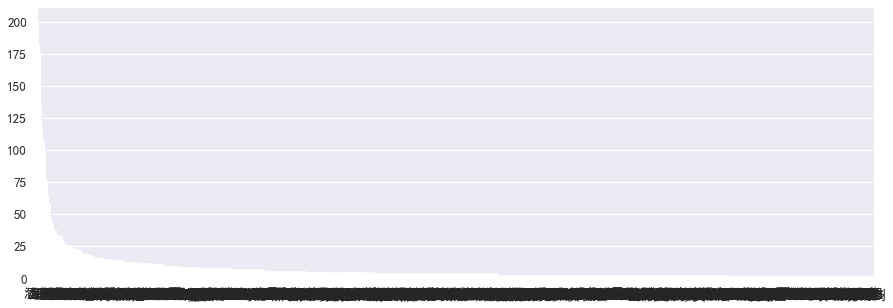

In [10]:
#解决上面中文显示乱码问题
plt.rcParams["font.sans-serif"] = ["SimHei"]   
plt.rcParams["axes.unicode_minus"] = False

d = dict(content)
plt.figure(figsize=(15,5))
# seaborn 内部不支持 dict_keys 与 dict_values 类型，matplotlib.bar 可以
sns.barplot(list(d.keys()),list(d.values()))

#### 词频统计


['2.55%', '2.31%', '2.23%', '1.70%', '1.49%', '1.35%', '1.24%', '1.00%', '0.95%', '0.83%', '0.73%', '0.62%', '0.54%', '0.54%', '0.48%', '0.48%', '0.44%', '0.43%', '0.43%', '0.43%']


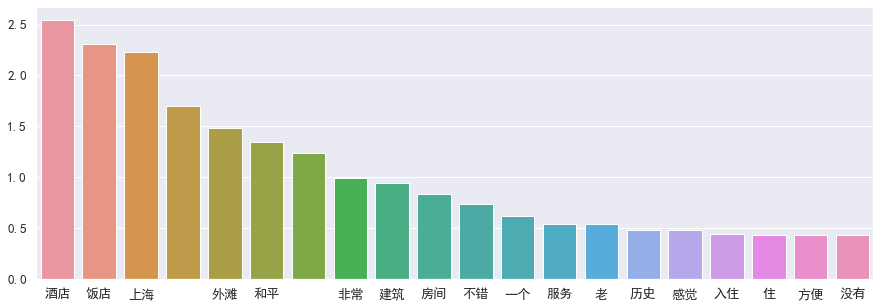

In [16]:
total = len(li_1d)
percentage = [v*100 / total for v in d.values()]
print([f"{v:.2f}%" for v in percentage])
plt.figure(figsize=(15,5))
sns.barplot(list(d.keys()),percentage)